In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge

In [2]:
def ridgeRegressionCG(Au, bu, xu, phi=0, i_max=1e6, epsilon=1e-6):
    iCheckFPErr = np.max([50, int(np.sqrt(np.size(Au, 1)))])
    i = 0
    x = Au.T @ xu; b = Au.T @ bu
    r = b - (Au.T @ (Au @ x) + phi * x)
    d = r
    delta_new = r.T.dot(r)
    delta_0 = delta_new
    X = []; X.append(x)
    while (i < i_max) & (delta_new > epsilon ** 2 * delta_0):
        q = Au.T @ (Au @ d) + phi * d
        alpha = delta_new / (d.T.dot(q))
        x = x + alpha * d
        if i % iCheckFPErr == 0:
            r = b - (Au.T @ (Au @ x) + phi * x)
        else:
            r = r - alpha * q
        delta_old = delta_new
        delta_new = r.T.dot(r)
        beta = delta_new / delta_old
        d = r + beta * d
        X.append(x)
        i += 1
    return x, np.array(X), i

In [3]:
# Generate sample data for regression
X, y, coefficients = make_regression(
    n_samples=50,
    n_features=2,
    n_informative=2,
    n_targets=1,
    noise=5,
    coef=True,
    random_state=1
)
print("w =", coefficients)

w = [80.71051956 38.78606441]


In [4]:
alpha = 1

In [5]:
# Solve using CG-based Ridge Regression
Au = X; bu = y.reshape(-1, 1); xu_0 = np.zeros(np.shape(bu))
w_cgm, _, _ = ridgeRegressionCG(Au, bu, xu_0, phi=alpha)
print("w_cgm =", w_cgm)

w_cgm = [[78.67157736]
 [38.47318203]]


In [6]:
# Solve by inverting regularized matrix
_, m = X.shape
I = np.identity(m)
w_inv = np.linalg.inv(X.T @ X + alpha * I) @ X.T @ y
print("w_inv =", w_inv)

w_inv = [78.67157736 38.47318203]


In [7]:
# Solve using scikit-learn implementation of Ridge Regression
rr = Ridge(alpha=alpha)
rr.fit(X, y)
w_skl = rr.coef_
print("w_skl =", w_skl)

w_skl = [78.59919749 38.46525658]


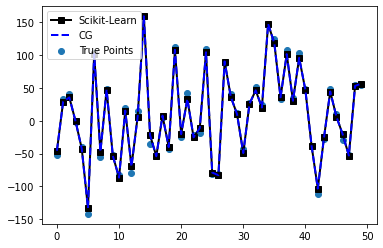

In [8]:
plt.scatter(range(0, len(y)), y, label='True Points')
plt.plot(X @ w_skl, '-s', c='k', linewidth=2, label='Scikit-Learn')
# plt.plot(X @ w_inv, '-^', c='r', linewidth=1, label='Inverse')
plt.plot(X @ w_cgm, '--', c='b', linewidth=2, label='CG')
plt.legend()
plt.show()